In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')
from skimage.measure import regionprops_table

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')

In [3]:
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'min_max_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (369, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_segmentation': GeoDataFrame shape: (76, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_size': GeoDataFrame shape: (275, 1) (2D shapes)
│     ├── 'segmentation_mask_boundaries': GeoDataFrame shape: (11283, 1) (2D shapes)
│     └── 'to_plot_napari': GeoDataFrame shape: (11283, 1) (2D shapes)
└── Table
      └── A

In [4]:
def calculate_intensity(sdata):
    props = ['label','area', 'intensity_mean']
    props_all = ['label','area','area_bbox','area_convex','area_filled','equivalent_diameter_area','feret_diameter_max','perimeter','perimeter_crofton','axis_major_length','axis_minor_length','eccentricity','extent','solidity','intensity_max','intensity_mean','intensity_min']
    # area = shapeSize
    table=pd.DataFrame.from_dict(regionprops_table(sdata['segmentation_mask'].to_numpy(),intensity_image=sdata['clahe'].sel(c=0).to_numpy(),properties=props_all))
    table=table.set_index('label')
    table['filtered']=~table.index.isin(sdata.table.obs.index.values.astype(int))
    table = table[table['filtered']==False]
    table = table.drop(columns=['filtered'])
    return table

In [5]:
table_props = calculate_intensity(sdata)
table_props

,area,area_bbox,area_convex,area_filled,equivalent_diameter_area,feret_diameter_max,perimeter,perimeter_crofton,axis_major_length,axis_minor_length,eccentricity,extent,solidity,intensity_max,intensity_mean,intensity_min
label,,,,,,,,,,,,,,,,
65,3728.0,4860.0,3847.0,3728.0,68.895842,108.558740,267.237590,256.038639,111.012508,43.346304,0.920619,0.767078,0.969067,12789.0,5968.852200,551.0
66,1157.0,1620.0,1191.0,1157.0,38.381482,45.880279,131.053824,126.928333,44.716653,33.785370,0.655099,0.714198,0.971453,13766.0,6182.070873,4.0
67,3066.0,4158.0,3159.0,3066.0,62.480016,79.404030,220.166522,211.412469,76.956852,52.034155,0.736767,0.737374,0.970560,17522.0,8929.311807,139.0
129,1786.0,2520.0,1849.0,1786.0,47.686537,71.805292,175.781746,169.333062,68.306034,33.639621,0.870322,0.708730,0.965928,11404.0,4797.480403,4.0
130,4065.0,6106.0,4321.0,4065.0,71.942468,86.579443,260.592929,249.739106,89.995832,58.929958,0.755796,0.665739,0.940754,14863.0,7797.396064,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32713,3743.0,5751.0,3998.0,3743.0,69.034308,88.684835,248.936075,238.687715,90.109399,55.204027,0.790367,0.650843,0.936218,17506.0,7599.519904,112.0
32777,4052.0,5760.0,4141.0,4052.0,71.827339,84.023806,244.350288,234.340117,84.011020,61.584904,0.680167,0.703472,0.978508,17704.0,8741.785785,4.0
32841,3277.0,4380.0,3351.0,3277.0,64.594164,79.404030,224.894444,215.894820,78.994538,52.916208,0.742477,0.748174,0.977917,19595.0,8916.264876,4.0


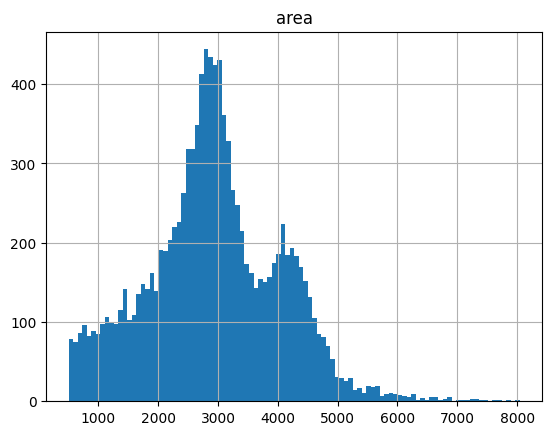

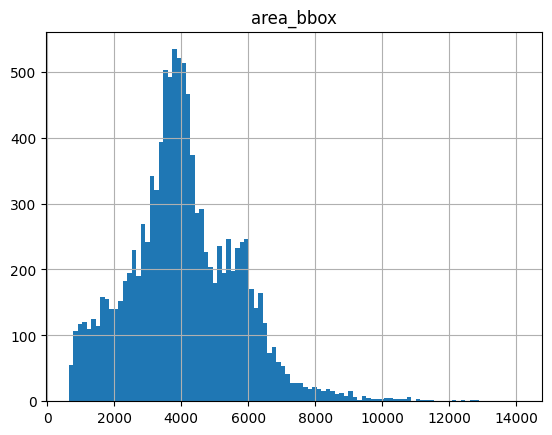

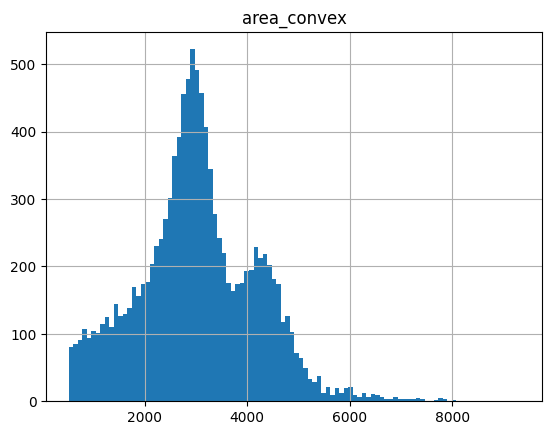

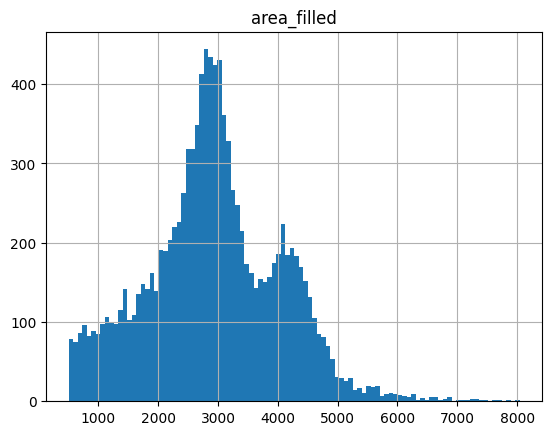

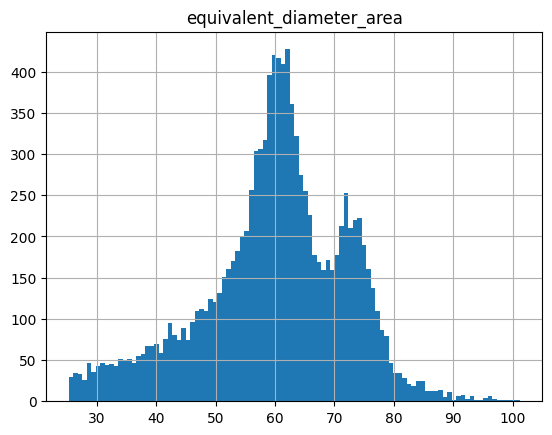

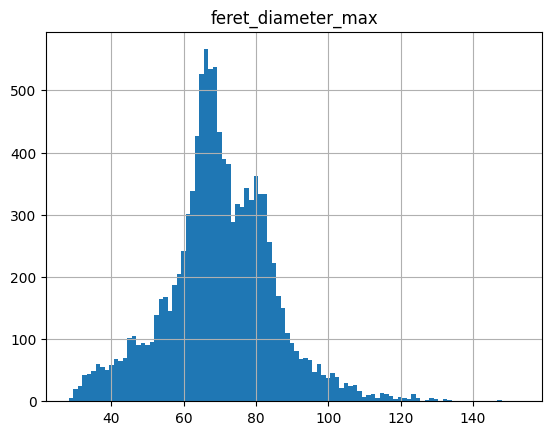

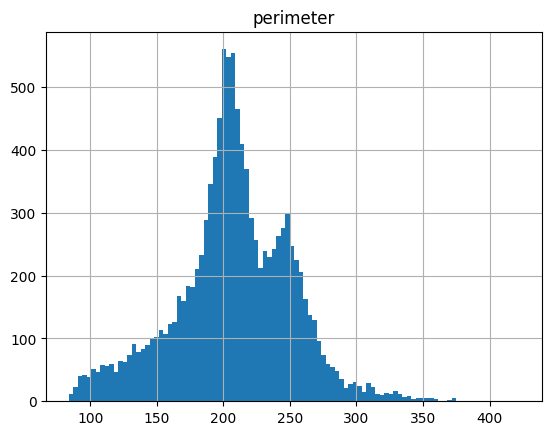

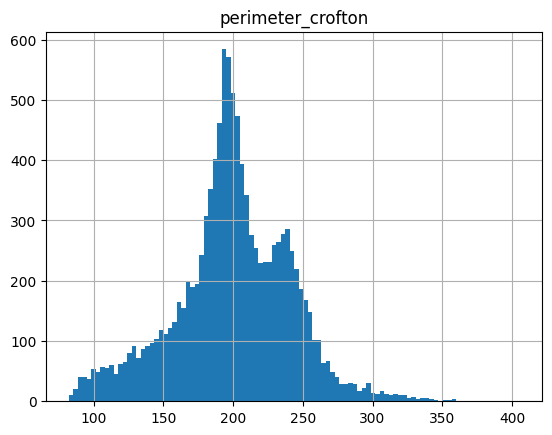

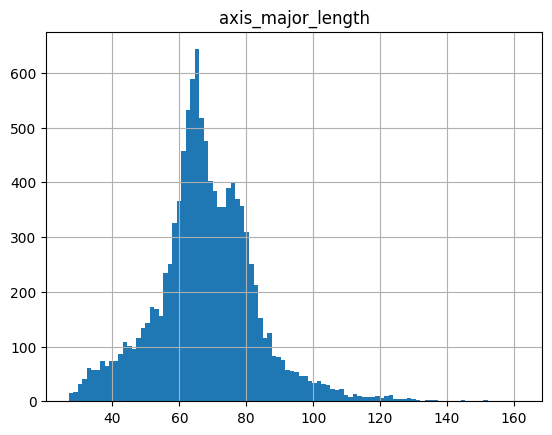

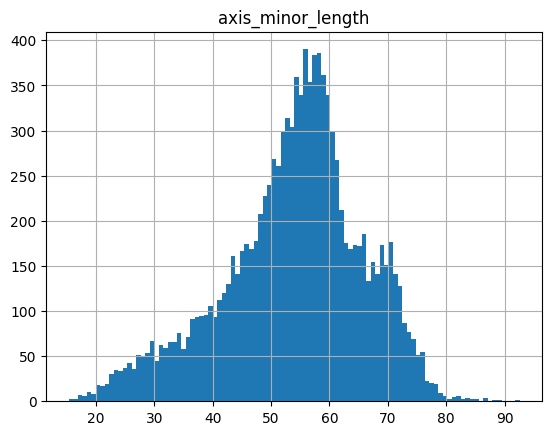

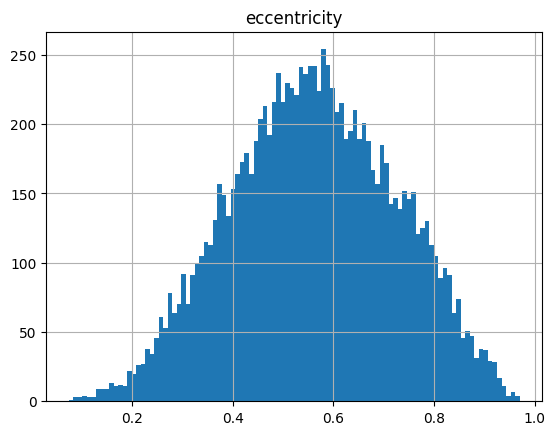

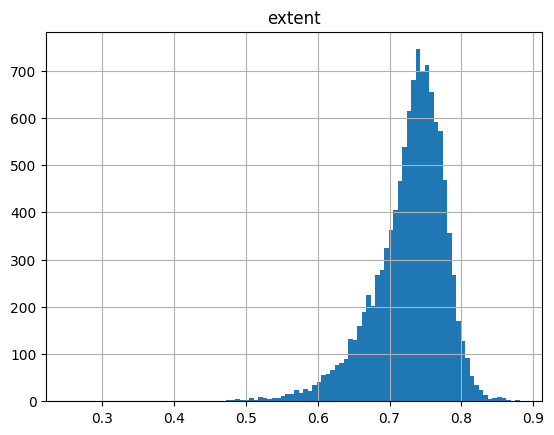

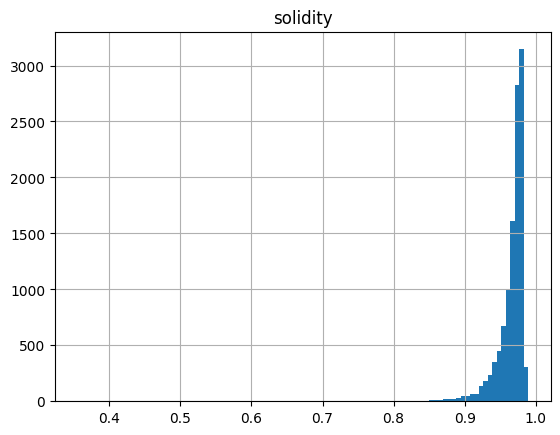

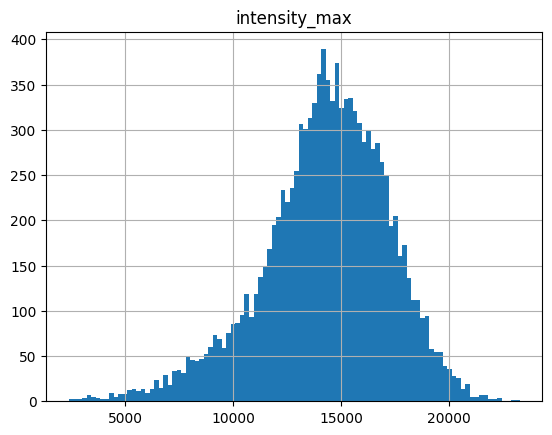

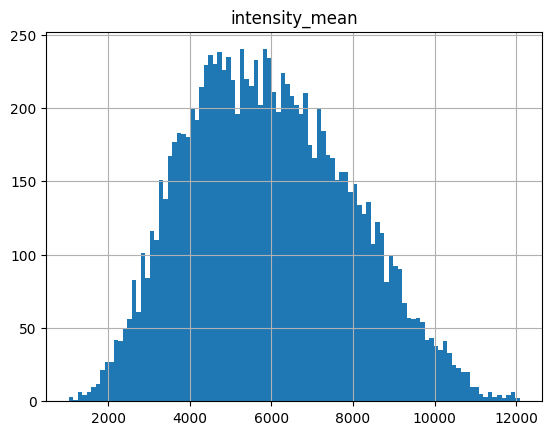

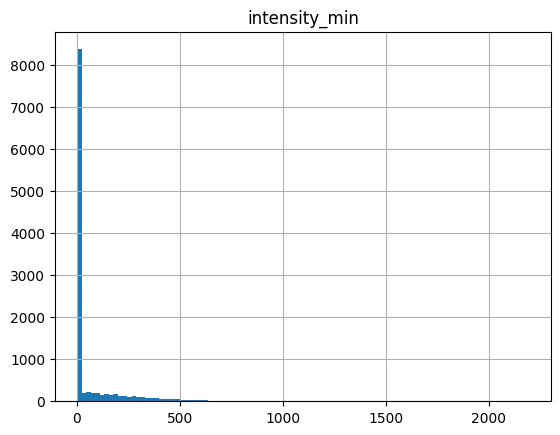

In [6]:
# make histogram of each column
for col in table_props.columns:
    table_props[col].hist(bins=100)
    plt.title(col)
    plt.show()

<AxesSubplot: >

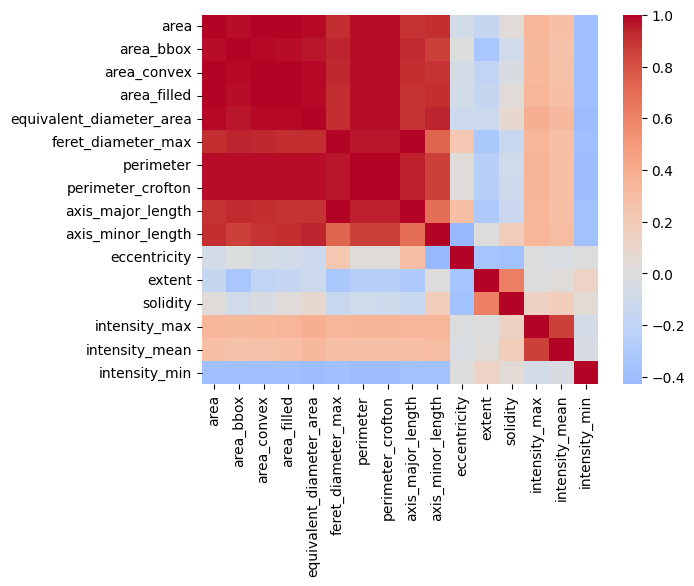

In [7]:
# make correlation matrix of the columns
corr = table_props.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)

In [8]:
# I think these are the most interesting:
# area: (= shapeSize)
# eccentricity: between 0 and 1, 0 being a circle, the closer to 1, the more elongated the ellips 
# extent: area / area of the smallest bounding box around the shape (rectangle)
# solidity: area / area of the smallest convex polygon around the shape
# intensity_mean
# (intensity_max)
# (intensity_min)

In [9]:
# add table_props to the anndata.obs
anndata.obs['area'] = table_props['area'].to_list()
anndata.obs['eccentricity'] = table_props['eccentricity'].to_list()
anndata.obs['extent'] = table_props['extent'].to_list()
anndata.obs['solidity'] = table_props['solidity'].to_list()
anndata.obs['intensity_mean'] = table_props['intensity_mean'].to_list()
#anndata.obs['intensity_max'] = table_props['intensity_max'].to_list()
#anndata.obs['intensity_min'] = table_props['intensity_min'].to_list()

In [10]:
anndata.obs

,region,instance,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_2_genes,pct_counts_in_top_5_genes,n_counts,shapeSize,...,annotation_score_genes_original_HLMartin_7,annotation_own_score_genes_HLMartin_7,annotation_own_score_genes_start_iterative_HLMartin_7,annotation_tangram_11,annotation_tangram_7,area,eccentricity,extent,solidity,intensity_mean
cells,,,,,,,,,,,,,,,,,,,,,
65,1,1,17,2.890372,100,4.615121,50.000000,76.000000,100,3728.0,...,Strom,Strom,Strom,Meso,Strom,3728.0,0.920619,0.767078,0.969067,5968.852200
66,1,1,14,2.708050,34,3.555348,41.176471,70.588235,34,1157.0,...,Hepa,Strom,Strom,Hepa,Hepa,1157.0,0.655099,0.714198,0.971453,6182.070873
67,1,1,18,2.944439,52,3.970292,50.000000,71.153846,52,3066.0,...,Hepa,Strom,Strom,Meso,Strom,3066.0,0.736767,0.737374,0.970560,8929.311807
129,1,1,13,2.639057,34,3.555348,41.176471,67.647059,34,1786.0,...,Strom,Strom,Strom,Meso,Strom,1786.0,0.870322,0.708730,0.965928,4797.480403
130,1,1,29,3.401197,142,4.962845,48.591549,61.971831,142,4065.0,...,Strom,Strom,Strom,Fibr,Strom,4065.0,0.755796,0.665739,0.940754,7797.396064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32713,1,1,26,3.295837,148,5.003946,39.864865,63.513514,148,3743.0,...,Kupf,Kupf,Kupf,Hepa,Hepa,3743.0,0.790367,0.650843,0.936218,7599.519904
32777,1,1,11,2.484907,148,5.003946,68.918919,90.540541,148,4052.0,...,Hepa,Hepa,Hepa,Hepa,Hepa,4052.0,0.680167,0.703472,0.978508,8741.785785
32841,1,1,25,3.258097,115,4.753590,47.826087,69.565217,115,3277.0,...,Kupf,Kupf,Kupf,Kupf,Kupf,3277.0,0.742477,0.748174,0.977917,8916.264876


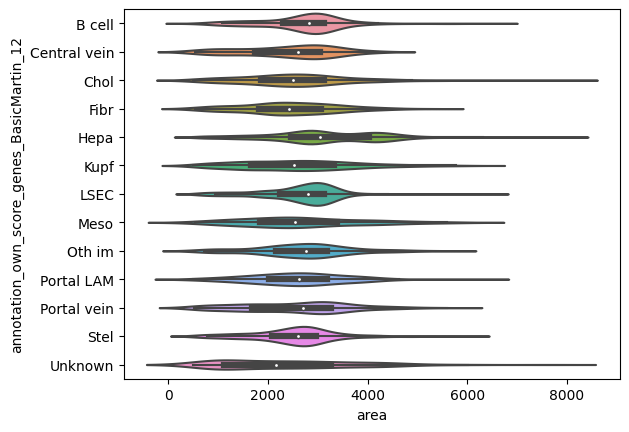

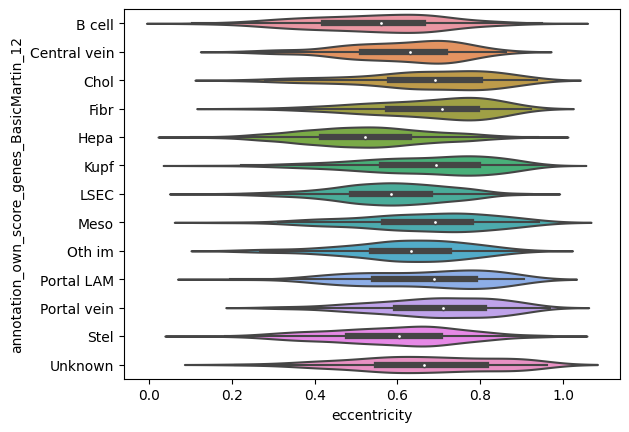

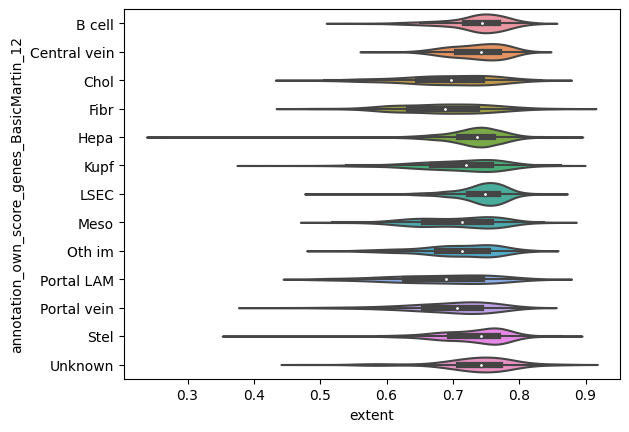

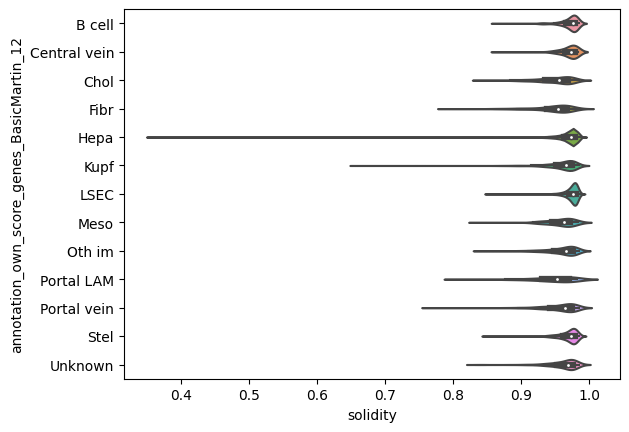

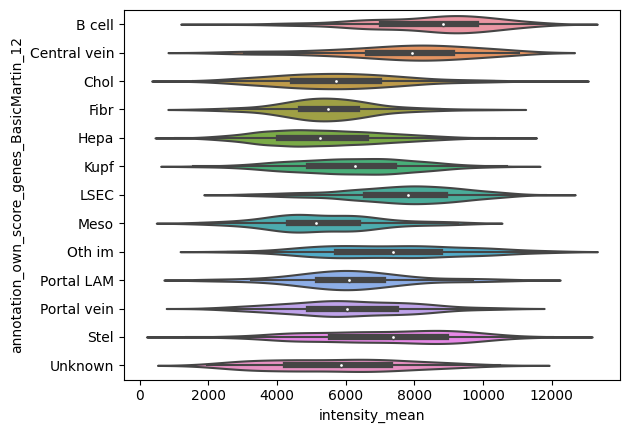

In [11]:
sns.violinplot(data=anndata.obs,x="area",y="annotation_own_score_genes_BasicMartin_12")
plt.show()
sns.violinplot(data=anndata.obs,x="eccentricity",y="annotation_own_score_genes_BasicMartin_12")
plt.show()
sns.violinplot(data=anndata.obs,x="extent",y="annotation_own_score_genes_BasicMartin_12")
plt.show()
sns.violinplot(data=anndata.obs,x="solidity",y="annotation_own_score_genes_BasicMartin_12")
plt.show()
sns.violinplot(data=anndata.obs,x="intensity_mean",y="annotation_own_score_genes_BasicMartin_12")
plt.show()
#sns.violinplot(data=anndata.obs,x="intensity_max",y="annotation_own_score_genes_BasicMartin_12")
#plt.show()
#sns.violinplot(data=anndata.obs,x="intensity_min",y="annotation_own_score_genes_BasicMartin_12")
#plt.show()